[nltk_data] Downloading package punkt to /Users/talhaasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/talhaasan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/talhaasan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


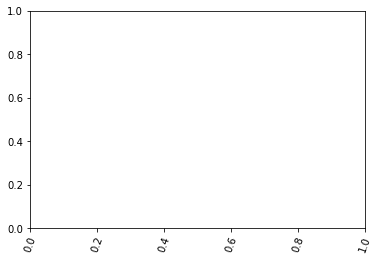

In [60]:
import sys   
!{sys.executable} -m pip install contractions
!{sys.executable} -m pip install fasttext
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
%matplotlib inline 
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [61]:
with open('senate2.csv') as f:
    df = pd.read_csv(f)
f.close()
df

,full_text
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch"
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ..."
...,...
264810,"We can come together to address hunger.\n \nToday, I was honored to join my friend @chefjoseandr..."
264811,@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...
264812,"During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a..."
264813,One way we can address hunger is by passing the FEED Act. Another is by expanding national servi...


In [62]:
df['no_contract'] = df['full_text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()
df

,full_text,no_contract
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]"
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a..."
...,...,...
264810,"We can come together to address hunger.\n \nToday, I was honored to join my friend @chefjoseandr...","[We, can, come, together, to, address, hunger., Today,, I, was, honored, to, join, my, friend, @..."
264811,@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@SenatorCardin, @SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our, sm..."
264812,"During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a...","[During, today’s, Small, Business, Committee, hearing,, I, highlighted, my, new, bill, with, @Se..."
264813,One way we can address hunger is by passing the FEED Act. Another is by expanding national servi...,"[One, way, we, can, address, hunger, is, by, passing, the, FEED, Act., Another, is, by, expandin..."


In [63]:
df['full_text_str'] = [' '.join(map(str, l)) for l in df['no_contract']]
df.head()
df

,full_text,no_contract,full_text_str
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch"
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ..."
...,...,...,...
264810,"We can come together to address hunger.\n \nToday, I was honored to join my friend @chefjoseandr...","[We, can, come, together, to, address, hunger., Today,, I, was, honored, to, join, my, friend, @...","We can come together to address hunger. Today, I was honored to join my friend @chefjoseandres, ..."
264811,@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@SenatorCardin, @SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our, sm...",@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...
264812,"During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a...","[During, today’s, Small, Business, Committee, hearing,, I, highlighted, my, new, bill, with, @Se...","During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a..."
264813,One way we can address hunger is by passing the FEED Act. Another is by expanding national servi...,"[One, way, we, can, address, hunger, is, by, passing, the, FEED, Act., Another, is, by, expandin...",One way we can address hunger is by passing the FEED Act. Another is by expanding national servi...


In [64]:
df['tokenized'] = df['full_text_str'].apply(word_tokenize)
df.head()
df

,full_text,no_contract,full_text_str,tokenized
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #..."
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago, ,, President, Biden, signed, the, #, AmericanRescuePlan, to, put, shots, in, arms..."
...,...,...,...,...
264810,"We can come together to address hunger.\n \nToday, I was honored to join my friend @chefjoseandr...","[We, can, come, together, to, address, hunger., Today,, I, was, honored, to, join, my, friend, @...","We can come together to address hunger. Today, I was honored to join my friend @chefjoseandres, ...","[We, can, come, together, to, address, hunger, ., Today, ,, I, was, honored, to, join, my, frien..."
264811,@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@SenatorCardin, @SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our, sm...",@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@, SenatorCardin, @, SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our..."
264812,"During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a...","[During, today’s, Small, Business, Committee, hearing,, I, highlighted, my, new, bill, with, @Se...","During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a...","[During, today, ’, s, Small, Business, Committee, hearing, ,, I, highlighted, my, new, bill, wit..."
264813,One way we can address hunger is by passing the FEED Act. Another is by expanding national servi...,"[One, way, we, can, address, hunger, is, by, passing, the, FEED, Act., Another, is, by, expandin...",One way we can address hunger is by passing the FEED Act. Another is by expanding national servi...,"[One, way, we, can, address, hunger, is, by, passing, the, FEED, Act, ., Another, is, by, expand..."


In [65]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()
df

,full_text,no_contract,full_text_str,tokenized,lower
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #...","[let, us, go, dancing, ,, @, delawarembb, !, congratulations, on, the, @, caasports, title, ., #..."
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen...","[yes, !, !, !, we, are, headed, to, the, ncaa, championship, !, !, !, !, let, us, go, #, bluehen..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago, ,, President, Biden, signed, the, #, AmericanRescuePlan, to, put, shots, in, arms...","[a, year, ago, ,, president, biden, signed, the, #, americanrescueplan, to, put, shots, in, arms..."
...,...,...,...,...,...
264810,"We can come together to address hunger.\n \nToday, I was honored to join my friend @chefjoseandr...","[We, can, come, together, to, address, hunger., Today,, I, was, honored, to, join, my, friend, @...","We can come together to address hunger. Today, I was honored to join my friend @chefjoseandres, ...","[We, can, come, together, to, address, hunger, ., Today, ,, I, was, honored, to, join, my, frien...","[we, can, come, together, to, address, hunger, ., today, ,, i, was, honored, to, join, my, frien..."
264811,@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@SenatorCardin, @SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our, sm...",@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@, SenatorCardin, @, SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our...","[@, senatorcardin, @, senatorshaheen, only, by, aggressively, targeting, aid, can, we, save, our..."
264812,"During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a...","[During, today’s, Small, Business, Committee, hearing,, I, highlighted, my, new, bill, with, @Se...","During today’s Small Business Committee hearing, I highlighted my new bill with @SenatorCardin a...","[During, today, ’, s, Small, Business, Committee, hearing, ,, I, highlight

In [66]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()
df

,full_text,no_contract,full_text_str,tokenized,lower,no_punc
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #...","[let, us, go, dancing, ,, @, delawarembb, !, congratulations, on, the, @, caasports, title, ., #...","[let, us, go, dancing, delawarembb, congratulations, on, the, caasports, title, thisismarch]"
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen...","[yes, !, !, !, we, are, headed, to, the, ncaa, championship, !, !, !, !, let, us, go, #, bluehen...","[yes, we, are, headed, to, the, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaa..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago, ,, President, Biden, signed, the, #, AmericanRescuePlan, to, put, shots, in, arms...","[a, year, ago, ,, president, biden, signed, the, #, americanrescueplan, to, put, shots, in, arms...","[a, year, ago, president, biden, signed, the, americanrescueplan, to, put, shots, in, arms, amp,..."
...,...,...,...,...,...,...
264810,"We can come together to address hunger.\n \nToday, I was honored to join my friend @chefjoseandr...","[We, can, come, together, to, address, hunger., Today,, I, was, honored, to, join, my, friend, @...","We can come together to address hunger. Today, I was honored to join my friend @chefjoseandres, ...","[We, can, come, together, to, address, hunger, ., Today, ,, I, was, honored, to, join, my, frien...","[we, can, come, together, to, address, hunger, ., today, ,, i, was, honored, to, join, my, frien...","[we, can, come, together, to, address, hunger, today, i, was, honored, to, join, my, friend, che..."
264811,@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we save our small business...,"[@SenatorCardin, @SenatorShaheen, Only, by, aggressively, targeting, aid, can, we, save, our, sm...",@SenatorCardin @SenatorShaheen Only by aggressively targeting aid can we sa

In [69]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()
df

,full_text,no_contract,full_text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #...","[let, us, go, dancing, ,, @, delawarembb, !, congratulations, on, the, @, caasports, title, ., #...","[let, us, go, dancing, delawarembb, congratulations, on, the, caasports, title, thisismarch]","[let, us, go, dancing, delawarembb, congratulations, caasports, title, thisismarch]","[(let, VB), (us, PRP), (go, VB), (dancing, VBG), (delawarembb, JJ), (congratulations, NNS), (caa..."
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen...","[yes, !, !, !, we, are, headed, to, the, ncaa, championship, !, !, !, !, let, us, go, #, bluehen...","[yes, we, are, headed, to, the, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaa...","[yes, headed, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaardn]","[(yes, RB), (headed, VBN), (ncaa, JJ), (championship, NN), (let, VB), (us, PRP), (go, VB), (blue..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[journalists, report, warzones, incredible, personal, risk, hopes, work, would, light, darkness,...","[(journalists, NNS), (report, VBP), (warzones, NNS), (incredible, JJ), (personal, JJ), (risk, NN..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, see, judicial, conference, adopting, many, proposals, courthouse, ethics, transparency, a...","[(glad, JJ), (see, VBP), (judicial, JJ), (conference, NN), (adopting, VBG), (many, JJ), (proposa..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago, ,, President, Biden, signed, the, #, AmericanRescuePlan, to, put, shots, in, arms...","[a, year, ago, ,, president, biden, signed, the, #, americanrescueplan, to, put, shots, in, arms...","[a, year, ago, president, biden, signed, the, americanrescueplan, to, put, shots, in, arms, amp,...","[year, ago, president, biden, signed, americanrescueplan, put, shots, arms, amp, americans, back...","[(year, NN), (ago,

In [68]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()
df

,full_text,no_contract,full_text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #...","[let, us, go, dancing, ,, @, delawarembb, !, congratulations, on, the, @, caasports, title, ., #...","[let, us, go, dancing, delawarembb, congratulations, on, the, caasports, title, thisismarch]","[let, us, go, dancing, delawarembb, congratulations, caasports, title, thisismarch]","[(let, VB), (us, PRP), (go, VB), (dancing, VBG), (delawarembb, JJ), (congratulations, NNS), (caa..."
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen...","[yes, !, !, !, we, are, headed, to, the, ncaa, championship, !, !, !, !, let, us, go, #, bluehen...","[yes, we, are, headed, to, the, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaa...","[yes, headed, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaardn]","[(yes, RB), (headed, VBN), (ncaa, JJ), (championship, NN), (let, VB), (us, PRP), (go, VB), (blue..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[journalists, report, warzones, incredible, personal, risk, hopes, work, would, light, darkness,...","[(journalists, NNS), (report, VBP), (warzones, NNS), (incredible, JJ), (personal, JJ), (risk, NN..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, see, judicial, conference, adopting, many, proposals, courthouse, ethics, transparency, a...","[(glad, JJ), (see, VBP), (judicial, JJ), (conference, NN), (adopting, VBG), (many, JJ), (proposa..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago, ,, President, Biden, signed, the, #, AmericanRescuePlan, to, put, shots, in, arms...","[a, year, ago, ,, president, biden, signed, the, #, americanrescueplan, to, put, shots, in, arms...","[a, year, ago, president, biden, signed, the, americanrescueplan, to, put, shots, in, arms, amp,...","[year, ago, president, biden, signed, americanrescueplan, put, shots, arms, amp, americans, back...","[(year, NN), (ago,

In [72]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()
df

,full_text,no_contract,full_text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #...","[let, us, go, dancing, ,, @, delawarembb, !, congratulations, on, the, @, caasports, title, ., #...","[let, us, go, dancing, delawarembb, congratulations, on, the, caasports, title, thisismarch]","[let, us, go, dancing, delawarembb, congratulations, caasports, title, thisismarch]","[(let, VB), (us, PRP), (go, VB), (dancing, VBG), (delawarembb, JJ), (congratulations, NNS), (caa...","[(let, v), (us, n), (go, v), (dancing, v), (delawarembb, a), (congratulations, n), (caasports, n..."
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen...","[yes, !, !, !, we, are, headed, to, the, ncaa, championship, !, !, !, !, let, us, go, #, bluehen...","[yes, we, are, headed, to, the, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaa...","[yes, headed, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaardn]","[(yes, RB), (headed, VBN), (ncaa, JJ), (championship, NN), (let, VB), (us, PRP), (go, VB), (blue...","[(yes, r), (headed, v), (ncaa, a), (championship, n), (let, v), (us, n), (go, v), (bluehens, n),..."
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[journalists, report, warzones, incredible, personal, risk, hopes, work, would, light, darkness,...","[(journalists, NNS), (report, VBP), (warzones, NNS), (incredible, JJ), (personal, JJ), (risk, NN...","[(journalists, n), (report, v), (warzones, n), (incredible, a), (personal, a), (risk, n), (hopes..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, see, judicial, conference, adopting, many, proposals, courthouse, ethics, transparency, a...","[(glad, JJ), (see, VBP), (judicial, JJ), (conference, NN), (adopting, VBG), (many, JJ), (proposa...","[(glad, a), (see, v), (judicial, a), (conference, n), (adopting, v), (many, a), (proposals, n), ..."
4,"A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, year, ago,, President, Biden, signed, the, #AmericanRescuePlan, to, put, shots, in, arms, &a...","A year ago, President Biden signed the #AmericanRescuePlan to put shots in arms &amp; Americans ...","[A, ye

In [73]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()
df

,full_text,no_contract,full_text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,"Let's go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let us, go, dancing,, @DelawareMBB!, Congratulations, on, the, @CAASports, title., #ThisIsMarch]","Let us go dancing, @DelawareMBB! Congratulations on the @CAASports title. #ThisIsMarch","[Let, us, go, dancing, ,, @, DelawareMBB, !, Congratulations, on, the, @, CAASports, title, ., #...","[let, us, go, dancing, ,, @, delawarembb, !, congratulations, on, the, @, caasports, title, ., #...","[let, us, go, dancing, delawarembb, congratulations, on, the, caasports, title, thisismarch]","[let, us, go, dancing, delawarembb, congratulations, caasports, title, thisismarch]","[(let, VB), (us, PRP), (go, VB), (dancing, VBG), (delawarembb, JJ), (congratulations, NNS), (caa...","[(let, v), (us, n), (go, v), (dancing, v), (delawarembb, a), (congratulations, n), (caasports, n...","[let, u, go, dance, delawarembb, congratulation, caasports, title, thisismarch]"
1,Yes!!! We’re headed to the NCAA Championship!!!! Let’s Go #BlueHens https://t.co/EgCuwaArdN,"[Yes!!!, We are, headed, to, the, NCAA, Championship!!!!, Let us, Go, #BlueHens, https://t.co/Eg...",Yes!!! We are headed to the NCAA Championship!!!! Let us Go #BlueHens https://t.co/EgCuwaArdN,"[Yes, !, !, !, We, are, headed, to, the, NCAA, Championship, !, !, !, !, Let, us, Go, #, BlueHen...","[yes, !, !, !, we, are, headed, to, the, ncaa, championship, !, !, !, !, let, us, go, #, bluehen...","[yes, we, are, headed, to, the, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaa...","[yes, headed, ncaa, championship, let, us, go, bluehens, https, //t.co/egcuwaardn]","[(yes, RB), (headed, VBN), (ncaa, JJ), (championship, NN), (let, VB), (us, PRP), (go, VB), (blue...","[(yes, r), (headed, v), (ncaa, a), (championship, n), (let, v), (us, n), (go, v), (bluehens, n),...","[yes, head, ncaa, championship, let, u, go, bluehens, https, //t.co/egcuwaardn]"
2,The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...",The journalists who report from warzones do so at incredible personal risk in hopes that their w...,"[The, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[the, journalists, who, report, from, warzones, do, so, at, incredible, personal, risk, in, hope...","[journalists, report, warzones, incredible, personal, risk, hopes, work, would, light, darkness,...","[(journalists, NNS), (report, VBP), (warzones, NNS), (incredible, JJ), (personal, JJ), (risk, NN...","[(journalists, n), (report, v), (warzones, n), (incredible, a), (personal, a), (risk, n), (hopes...","[journalist, report, warzones, incredible, personal, risk, hope, work, would, light, darkness, b..."
3,Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...",Glad to see the Judicial Conference adopting many of the proposals in my Courthouse Ethics and T...,"[Glad, to, see, the, Judicial, Conference, adopting, many, of, the, proposals, in, my, Courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, to, see, the, judicial, conference, adopting, many, of, the, proposals, in, my, courthous...","[glad, see, judicial, conference, adopting, many, proposals, courthouse, ethics, transparency, a...","[(glad, JJ), (see, VBP), (judicial, JJ), (conference, NN), (adopting, VBG), (many, JJ), (proposa...","[(glad, a), (see, v), (judicial, a), (conference, n), (adopting, v), (many, a), (proposals, n), ...","[glad, see, judicial, conference, ado

In [76]:
df['lemmatized'].to_csv('lemmatized.csv')